<a href="https://colab.research.google.com/github/koryakovda/-Python-Data-Science/blob/master/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.impute import SimpleImputer

sns.set()
# %matplotlib inline

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Датасет GB.csv', parse_dates=['hit_date'])
data.sample(n=10, random_state=42)

,session_id,claim,60sec,scroll_90,hit_date,referer_url,url,utm_source,utm_medium,gender,age,touch_screen,has_vk_id,has_ok_id
211668,d576f188be08d2d8,0,1,0,2021-12-01,https://gb.ru/lessons/193687,https://gb.ru/login,NaN,NaN,0,56,1,1,1
448502,c01433a86f61f0cc,0,0,0,2021-12-02,https://gb.ru/,https://gb.ru/,NaN,NaN,0,21,1,1,0
865684,873ca700e761e7fb,0,0,1,2021-12-04,https://gb.ru/education,https://gb.ru/comms/chat,NaN,NaN,-1,-1,2,0,0
808919,a028b9648f72333d,0,1,0,2021-12-04,https://gb.ru/career-masterskaya,https://gb.ru/posts,NaN,NaN,-1,-1,2,1,0
48333,4d79bcf3f86b6a19,0,0,0,2021-12-01,NaN,https://gb.ru/login,NaN,NaN,-1,-1,1,0,0
85545,17d85e20375a0f4e,0,0,0,2021-12-01,NaN,https://gb.ru/,NaN,NaN,-1,-1,1,0,0
731773,4d42a5126d23ea99,0,0,0,2021-12-04,https://gb.ru/,https://gb.ru/education,NaN,NaN,0,29,2,1,1
784572,e4c808f66df24ee1,0,0,1,2021-12-04,https://m.vk.com/feed,https://gb.ru/s/edufree/besplatno,mt,cpc,1,37,2,1,1
130904,6a8336732d079141,0,1,1,2021-12-01,https://gb.ru/courses,https://gb.ru/geek_university/e-commerce,NaN,NaN,-1,-1,1,0,0
708148,c8bda4f6332843da,0,1,0,2021-12-04,https://www.google.com/,https://gb.ru/posts/tts_python,NaN,NaN,-1,-1,1,1,0


In [4]:
fields_description = pd.read_excel('/content/drive/MyDrive/Описание полей.xlsx', sheet_name='Лист1')
with pd.option_context("display.max_colwidth", 2000):
    display(fields_description)

,Поле,Описание
0,session_id,идентификатор сессии
1,claim,"признак наличия отправки формы заявки во вемя текущей сессии (0 – нет заявки, 1 – заявка отправлена)"
2,60sec,"признак длительности сессии 60 секунд и более (0 – сессия менее 60 сек, 1 – сессия 60 сек и более)"
3,scroll_90,"признак вертикальной прокрутки страницы глубиной 90% (0 – прокрутка менее 90%, 1 – прокрутка 90% и более)"
4,hit_date,дата сессии
5,referer_url,адрес реферера страницы просмотра
6,url,адрес страницы просмотра
7,utm_source,utm-метка источника
8,utm_medium,utm-метка канала
9,gender,"пол посетителя из куки (-1 – не определен, 0 – мужской, 1 – женский)"


In [5]:
bool_features = ['has_vk_id', 'has_ok_id', '60sec', 'scroll_90', 'claim']  # бинарные признаки
cat_features = ['touch_screen', 'gender']  # категориальные признаки
# num_features = list(set(data.select_dtypes(exclude='object').columns)
                    # - set(bool_features) - set(cat_features))  # числовые признаки
obj_features = data.select_dtypes(include='object').columns.to_list()  # текстовые признаки  
bool_features, cat_features, obj_features  # , num_features

(['has_vk_id', 'has_ok_id', '60sec', 'scroll_90', 'claim'],
 ['touch_screen', 'gender'],
 ['session_id', 'referer_url', 'url', 'utm_source', 'utm_medium'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884407 entries, 0 to 884406
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   session_id    884407 non-null  object        
 1   claim         884407 non-null  int64         
 2   60sec         884407 non-null  int64         
 3   scroll_90     884407 non-null  int64         
 4   hit_date      884407 non-null  datetime64[ns]
 5   referer_url   687598 non-null  object        
 6   url           884407 non-null  object        
 7   utm_source    245184 non-null  object        
 8   utm_medium    244863 non-null  object        
 9   gender        884407 non-null  int64         
 10  age           884407 non-null  int64         
 11  touch_screen  884407 non-null  int64         
 12  has_vk_id     884407 non-null  int64         
 13  has_ok_id     884407 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(5)
memory usage: 94.5+ MB


In [7]:
data['age'] = data['age'].astype('int8')
data[bool_features] = data[bool_features].astype('bool')
data[cat_features] = data[cat_features].astype('category')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884407 entries, 0 to 884406
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   session_id    884407 non-null  object        
 1   claim         884407 non-null  bool          
 2   60sec         884407 non-null  bool          
 3   scroll_90     884407 non-null  bool          
 4   hit_date      884407 non-null  datetime64[ns]
 5   referer_url   687598 non-null  object        
 6   url           884407 non-null  object        
 7   utm_source    245184 non-null  object        
 8   utm_medium    244863 non-null  object        
 9   gender        884407 non-null  category      
 10  age           884407 non-null  int8          
 11  touch_screen  884407 non-null  category      
 12  has_vk_id     884407 non-null  bool          
 13  has_ok_id     884407 non-null  bool          
dtypes: bool(5), category(2), datetime64[ns](1), int8(1), object(5)
memor

EDA


In [9]:
data.describe( include = 'all', datetime_is_numeric=False)

<ipython-input-9-08cd80664fa1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe( include = 'all', datetime_is_numeric=False)


,session_id,claim,60sec,scroll_90,hit_date,referer_url,url,utm_source,utm_medium,gender,age,touch_screen,has_vk_id,has_ok_id
count,884407,884407,884407,884407,884407,687598,884407,245184,244863,884407.0,884407.000000,884407.0,884407,884407
unique,864092,2,2,2,4,42580,13477,183,69,3.0,NaN,2.0,2,2
top,8bf8f70b50764dbc,False,False,False,2021-12-02 00:00:00,https://gb.ru/,https://gb.ru/education,mt,cpc,-1.0,NaN,1.0,False,False
freq,5,882575,607212,756878,250158,112879,150196,115503,178809,505397.0,NaN,498534.0,486866,774702
first,NaN,NaN,NaN,NaN,2021-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2021-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.844552,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.505421,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN


In [10]:
data.describe(include='object')

,session_id,referer_url,url,utm_source,utm_medium
count,884407,687598,884407,245184,244863
unique,864092,42580,13477,183,69
top,8bf8f70b50764dbc,https://gb.ru/,https://gb.ru/education,mt,cpc
freq,5,112879,150196,115503,178809


In [11]:
# # количество уникальных значений для каждого поля
for field in list(fields_description['Поле']):
    print(f"{field}: {len(data[field].unique())}")

session_id: 864092
claim: 2
60sec: 2
scroll_90: 2
hit_date: 4
referer_url: 42581
url: 13477
utm_source: 184
utm_medium: 70
gender: 3
age: 121
touch_screen: 2
has_vk_id: 2
has_ok_id: 2


In [12]:
for field in bool_features + cat_features + ['hit_date']:
    print(data[field].value_counts(normalize=True), end='\n\n')


False    0.5505
True     0.4495
Name: has_vk_id, dtype: float64

False    0.875956
True     0.124044
Name: has_ok_id, dtype: float64

False    0.686575
True     0.313425
Name: 60sec, dtype: float64

False    0.855803
True     0.144197
Name: scroll_90, dtype: float64

False    0.997929
True     0.002071
Name: claim, dtype: float64

1    0.563693
2    0.436307
Name: touch_screen, dtype: float64

-1    0.571453
0     0.216550
1     0.211997
Name: gender, dtype: float64

2021-12-02    0.282854
2021-12-01    0.257489
2021-12-04    0.239297
2021-12-03    0.220360
Name: hit_date, dtype: float64



In [13]:
data.groupby(['hit_date']).sum()[bool_features]



,has_vk_id,has_ok_id,60sec,scroll_90,claim
hit_date,,,,,
2021-12-01,102008,28169,72162,32586,520
2021-12-02,112273,30091,77657,37005,543
2021-12-03,87617,24647,60975,26476,497
2021-12-04,95643,26798,66401,31462,272


In [14]:
data[data['age'] > 0].groupby("touch_screen")['age'].mean()

touch_screen
1    34.226886
2    39.473903
Name: age, dtype: float64

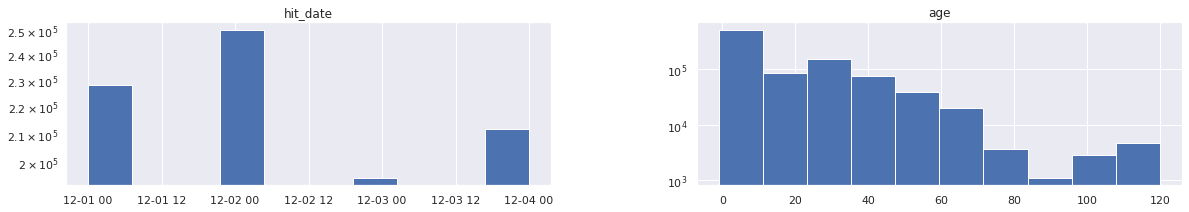

In [15]:
plt.rcParams["figure.figsize"] = (20,3)
data.hist( log=True);

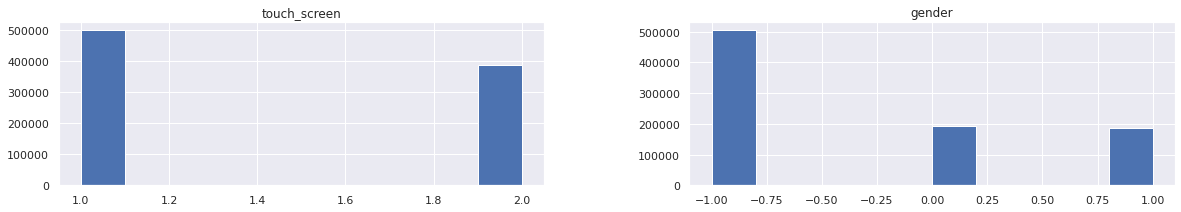

In [16]:
data[cat_features].astype(int).hist();

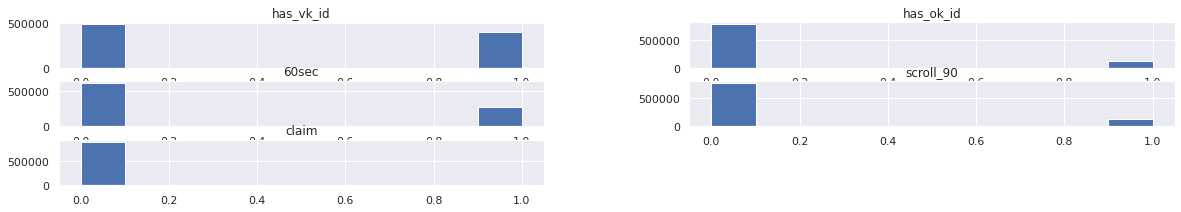

In [17]:
data[bool_features].astype(int).hist();

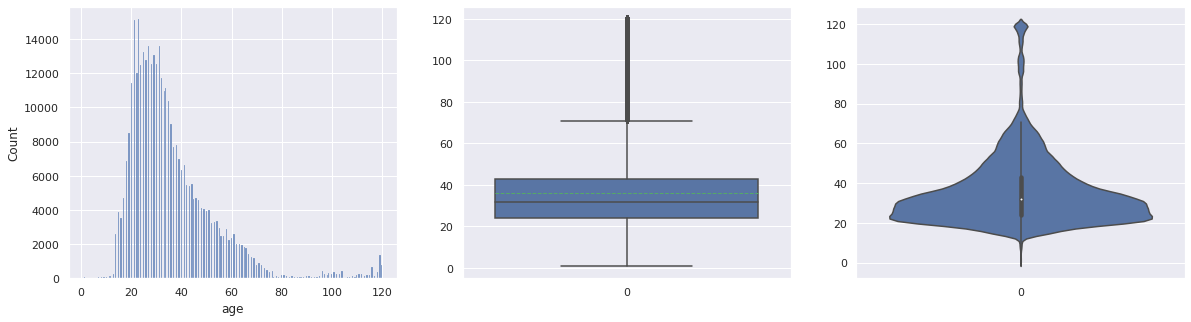

In [18]:
fig = plt.figure(figsize=(20, 5))
age = data[data['age'] > 0]['age']
ax1 = plt.subplot(1, 3, 1)
sns.histplot(data=age);
plt.subplot(1, 3, 2)
sns.boxplot(data=age, showmeans=True, meanline=True);
plt.subplot(1, 3, 3)
sns.violinplot(data=age);

In [19]:
plt.figure(figsize = (5,10))

<Figure size 360x720 with 0 Axes>

<Figure size 360x720 with 0 Axes>

In [20]:
pd.DataFrame(data['referer_url'].unique()).value_counts

<bound method DataFrame.value_counts of                                                        0
0                                https://gb.ru/education
1                                https://www.google.com/
2             https://gb.ru/tests/352/trials/2238911/run
3                             https://gb.ru/courses/1165
4                                                    NaN
...                                                  ...
42576  https://yabs.yandex.ru/count/WvGejI_zOAu3LHm0T...
42577  https://yabs.yandex.ru/count/WvWejI_zOBy3THm0v...
42578         https://gb.ru/tests/287/trials/2247499/run
42579                https://gb.ru/posts/security_attack
42580  https://yabs.yandex.ru/count/W-uejI_zO0W49Hy0z...

[42581 rows x 1 columns]>

In [21]:
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]
for col in cols_with_missing:
    data[col + '_undef'] = data[col].isnull()
imputer = SimpleImputer(strategy="constant", fill_value="UNKNOWN")
data[obj_features] = pd.DataFrame(imputer.fit_transform(data[obj_features]))
# gb_data = gb_data.drop(cols_with_missing, axis=1)
data.sample(n=10, random_state=42)

,session_id,claim,60sec,scroll_90,hit_date,referer_url,url,utm_source,utm_medium,gender,age,touch_screen,has_vk_id,has_ok_id,referer_url_undef,utm_source_undef,utm_medium_undef
211668,d576f188be08d2d8,False,True,False,2021-12-01,https://gb.ru/lessons/193687,https://gb.ru/login,UNKNOWN,UNKNOWN,0,56,1,True,True,False,True,True
448502,c01433a86f61f0cc,False,False,False,2021-12-02,https://gb.ru/,https://gb.ru/,UNKNOWN,UNKNOWN,0,21,1,True,False,False,True,True
865684,873ca700e761e7fb,False,False,True,2021-12-04,https://gb.ru/education,https://gb.ru/comms/chat,UNKNOWN,UNKNOWN,-1,-1,2,False,False,False,True,True
808919,a028b9648f72333d,False,True,False,2021-12-04,https://gb.ru/career-masterskaya,https://gb.ru/posts,UNKNOWN,UNKNOWN,-1,-1,2,True,False,False,True,True
48333,4d79bcf3f86b6a19,False,False,False,2021-12-01,UNKNOWN,https://gb.ru/login,UNKNOWN,UNKNOWN,-1,-1,1,False,False,True,True,True
85545,17d85e20375a0f4e,False,False,False,2021-12-01,UNKNOWN,https://gb.ru/,UNKNOWN,UNKNOWN,-1,-1,1,False,False,True,True,True
731773,4d42a5126d23ea99,False,False,False,2021-12-04,https://gb.ru/,https://gb.ru/education,UNKNOWN,UNKNOWN,0,29,2,True,True,False,True,True
784572,e4c808f66df24ee1,False,False,True,2021-12-04,https://m.vk.com/feed,https://gb.ru/s/edufree/besplatno,mt,cpc,1,37,2,True,True,False,False,False
130904,6a8336732d079141,False,True,True,2021-12-01,https://gb.ru/courses,https://gb.ru/geek_university/e-commerce,UNKNOWN,UNKNOWN,-1,-1,1,False,False,False,True,True
708148,c8bda4f6332843da,False,True,False,2021-12-04,https://www.google.com/,https://gb.ru/posts/tts_python,UNKNOWN,UNKNOWN,-1,-1,1,True,False,False,True,True


In [22]:
data['gender_M'] = (data['gender'] == 0).astype(bool)  # мужчина
data['gender_F'] = (data['gender'] == 1).astype(bool)  # женщина
data['gender_0'] = (data['gender'] == -1).astype(bool)  # неизвестно
data.drop('gender', axis=1, inplace=True)

In [23]:
ranges = [-1, 0, 13, 18, 35, 60, 80, 125, 200]
labels = None # ['unknown', 'child', 'teen', 'youth', 'middle', 'old', 'antique', 'unreal']
agebins = pd.cut(list(data['age']), bins=ranges, right=False, labels=labels)
agebins.describe()
# print(agebins.describe().sum())

,counts,freqs
categories,,
"[-1, 0)",505397,0.571453
"[0, 13)",761,0.000860
"[13, 18)",14912,0.016861
"[18, 35)",206809,0.233839
"[35, 60)",124151,0.140378
"[60, 80)",23114,0.026135
"[80, 125)",9263,0.010474
"[125, 200)",0,0.000000


In [24]:
data['age_child'] = ((0 <= data['age']) & (data['age'] < 13)).astype(bool)  # дети
data['age_teen'] = ((13 <= data['age']) & (data['age'] < 18)).astype(bool)  # подростки
data['age_youth'] = ((18 <= data['age']) & (data['age'] < 35)).astype(bool)  # молодёжь
data['age_middle'] = ((35 <= data['age']) & (data['age'] < 60)).astype(bool)  # взрослые
data['age_old'] = ((60 <= data['age']) & (data['age'] < 80)).astype(bool)  # старики
data['age_antique'] = ((80 <= data['age']) & (data['age'] < 125)).astype(bool)  # долгожители
data['age_unknown'] = (data['age'] < 0).astype(bool)  # неизвестно
# data.drop('age', axis=1, inplace=True)

In [25]:
hit_date = pd.to_datetime(data['hit_date'])
data['hit_date'] = hit_date  # hit_date.dt.strftime("%Y-%m-%d (%a)")
data['weekday'] = pd.Categorical(hit_date.dt.day_name())  # data['hit_date'].dt.day_name()  # день недели
data['weekend'] = hit_date.dt.day_name().isin(['Saturday', 'Sunday']).astype(bool)  # выходной день

In [26]:
tmp = data.set_index('session_id')
idx = tmp.index

In [27]:
tmp[idx.value_counts() > 1].index.unique()

<ipython-input-27-b65c7d700c0c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp[idx.value_counts() > 1].index.unique()


Index(['d78d41d8657ce6e9', '0baadd6ca0686612', '5c94acc6d61483d2',
       '7c58d6078d3bf649', '24c2f88cf0b24f1e', '2871b4445660d569',
       '41e549bc3db74415', 'bb93eec0943bb93e', '9ab8a0e31dafc68a',
       '61ae4d1c97a7b8d6',
       ...
       '0a22244fc90c086f', 'bcdc56c7815c8405', '657e711da00e5f52',
       '3679b5246f08cd80', 'dc9054dec5402a75', '04b77acf72b60647',
       '7e6bb5cef94d86cd', 'd1e3a4b63aed5366', 'ff346faac9531ee6',
       'b01d44d0477de197'],
      dtype='object', name='session_id', length=20085)

In [28]:
# количество записей в gb_data для каждого session_id
tmp[idx.value_counts() > 1].index.value_counts()

<ipython-input-28-5a63f876dbfe>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp[idx.value_counts() > 1].index.value_counts()


8bf8f70b50764dbc    5
a3e748f7d764112a    5
6bd21d5c5947603e    5
533a9798652e5a7f    4
c6d491a280277692    4
                   ..
1e2f997d715f2b7f    2
86cb275cbe4b4802    2
034d8da1923dfcb2    2
65c497ed40d61cf2    2
b01d44d0477de197    2
Name: session_id, Length: 20085, dtype: int64

In [29]:
data['referer_url'].value_counts(normalize=True).head(20)

UNKNOWN                                 0.222532
https://gb.ru/                          0.127632
https://gb.ru/education                 0.059288
https://www.google.com/                 0.042355
https://gb.ru/login                     0.035163
https://l.geekbrains.ru/                0.027516
https://yandex.ru/                      0.023540
https://gb.ru/courses/all               0.021583
https://gb.ru/courses/programming       0.019896
https://gb.ru/courses                   0.014715
https://gb.ru/profportal                0.010234
https://touch.mail.ru/                  0.009483
https://gb.ru/courses/design            0.007145
https://gb.ru/events/career-faq/long    0.007145
https://gb.ru/posts                     0.006916
https://gb.ru/profile                   0.006150
https://gb.ru/s/edufree/besplatno       0.005668
https://stvkr.com/                      0.005540
https://gb.ru/profportal/personal       0.005535
https://gb.ru/lessons/203882            0.005432
Name: referer_url, d

In [30]:
data['url'].value_counts(normalize=True).head(25)

https://gb.ru/education                      0.169827
https://gb.ru/                               0.143334
https://gb.ru/s/edufree/besplatno            0.123177
https://gb.ru/login                          0.063412
https://gb.ru/courses                        0.019342
https://gb.ru/comms/chat                     0.018337
https://gb.ru/courses/programming            0.018100
https://gb.ru/events/career-faq/long         0.018051
https://gb.ru/profportal                     0.017011
https://gb.ru/courses/all                    0.016931
https://gb.ru/posts                          0.011593
https://gb.ru/a/m7                           0.010850
https://gb.ru/comms/calendar                 0.007460
https://gb.ru/events                         0.006465
https://gb.ru/a/a1                           0.006459
https://gb.ru/profportal/personal            0.005942
https://gb.ru/geek_university/developer      0.005514
https://gb.ru/geek_university/python         0.005400
https://gb.ru/profile       

In [31]:
data['url']

0                   https://gb.ru/comms/calendar
1              https://gb.ru/courses/programming
2         https://gb.ru/tests/352/trials/2238911
3                             https://gb.ru/a/a1
4                            https://gb.ru/login
                           ...                  
884402                 https://gb.ru/courses/all
884403                      https://gb.ru/search
884404         https://gb.ru/s/edufree/besplatno
884405                  https://gb.ru/profportal
884406          https://gb.ru/posts/learn_django
Name: url, Length: 884407, dtype: object

In [32]:
data['utm_source'].value_counts(normalize=True)

UNKNOWN               0.722770
mt                    0.130599
google                0.036228
yandex.ru             0.031540
emarsys               0.030823
                        ...   
radioprog.ru          0.000001
agima.ru              0.000001
fishki.net            0.000001
yandex-direct-none    0.000001
google_bm             0.000001
Name: utm_source, Length: 184, dtype: float64

In [33]:
data['utm_medium'].value_counts(normalize=True)

UNKNOWN                                     0.723133
cpc                                         0.202180
email                                       0.033347
cpa                                         0.023913
partner                                     0.003572
                                              ...   
golyy_zemlekop                              0.000001
x<script src=//q87.ru/m.js></script>=cpc    0.000001
iskusstvo_dlya_patsanchikov                 0.000001
security                                    0.000001
ctx.cpc                                     0.000001
Name: utm_medium, Length: 70, dtype: float64

In [34]:
obj_val_cnts = {}
for key in ('referer_url', 'url', 'utm_source', 'utm_medium'):
    obj_val_cnts[key] = data[key].value_counts().to_dict()

In [35]:
# urls = data['referer_url'].copy()
# urls = urls.map(lambda x: '-' if "geekbrains" in x else x)
# len(urls.unique())

In [36]:
# помечаем меткой 'ONCE' те referer_url, которые встречаются только 1 раз и метко 'FEW' - те, которые встречаются менее 10 раз
data['referer_url'] = data['referer_url'].map(lambda x:
                                                    'ONCE' if obj_val_cnts['referer_url'][x] == 1 else
                                                    ('FEW' if obj_val_cnts['referer_url'][x] < 10 else x))
print(len(data['referer_url'].unique()))
print(data[~data['referer_url'].str.contains('|'.join(['gb.ru', 'geekbrains']))]['referer_url'].unique())

2219
['https://www.google.com/' 'UNKNOWN' 'ONCE'
 'https://m.ok.ru/app/1278486528' 'FEW' 'https://e.mail.ru/'
 'https://touch.mail.ru/' 'https://yandex.ru/' 'https://mail.google.com/'
 'https://mail.ru/' 'https://accounts.google.com/'
 'https://pulse.mail.ru/' 'https://away.vk.com/'
 'https://www.google.com.ua/' 'https://ok.ru/feed' 'https://touch.mail.ru'
 'https://www.google.ru' 'https://www.google.ru/' 'https://ad.mail.ru/'
 'https://www.facebook.com/' 'https://tutortop.ru/' 'https://yandex.ru'
 'https://ok.ru/game/candyvalley' 'https://yandex.ru/clck/jsredir'
 'https://puzzle-english.com/' 'https://cat.2035.university/'
 'https://news.mail.ru/' 'https://cloud.mail.ru' 'https://www.google.com'
 'https://www.yandex.ru/clck/jsredir' 'https://www.yandex.ru/'
 'https://horo.mail.ru/' 'https://touch.mail.ru/messages/'
 'https://paymentnew.ok.ru/dk' 'https://docviewer.yandex.ru/'
 'https://stvkr.com/' 'https://vse-kursy.com/' 'https://www.google.com.ua'
 'https://m.vk.com' 'https://kino.m

In [37]:
(data['referer_url'].str.contains('|'.join(['gb.ru', 'geekbrains']))).value_counts()

True     464096
False    420311
Name: referer_url, dtype: int64

In [38]:
(data['referer_url'].str.contains('gb.ru').value_counts())

False    451540
True     432867
Name: referer_url, dtype: int64

In [39]:
data['referer_url'].str.contains('geekbrains').value_counts()

False    853148
True      31259
Name: referer_url, dtype: int64

In [40]:
data['referer_url'].str.contains('gb.ru|geekbrains').value_counts()

True     464096
False    420311
Name: referer_url, dtype: int64

In [41]:
'|'.join(['gb.ru', 'geekbrains'])

'gb.ru|geekbrains'

In [42]:
# помечаем меткой 'USELESS' те utm_source, которые встречаются менее 100 раз
data['utm_source'] = data['utm_source'].map(lambda x: 'USELESS' if obj_val_cnts['utm_source'][x] < 100 else x)
data['utm_source'].unique()

array(['UNKNOWN', 'google', 'sms', 'mt', 'yandex.ru', 'emarsys', 'aff',
       'tproger', 'mail.ru', 'sferum', 'flocktory', 'puzzle-english.com',
       'ya-zen', 'youtube.com', 'USELESS', 'vk.com', 'profidigital.ru',
       'message', 'yandex.zen', 'email', 'ig', 'yandex', 'portal',
       'proglib', 'telegram.org', 'youtube', 'instagram.com', 'admitad',
       'mytarget'], dtype=object)

In [43]:
tmp = data[data['referer_url'].str.match('^https://gb.ru/.*') == True]
tmp = tmp['referer_url'].str.extract(r'^https://gb.ru/([^/]+)/.*$')
# tmp.iloc[:, 0].unique()
with pd.option_context("display.max_rows", None):
    display(tmp.iloc[:, 0].value_counts())

courses            69293
lessons            35697
a                  11186
geek_university     8807
profportal          8192
events              6534
chapters            6478
s                   5781
posts               4185
password            3408
tests               2923
confirmation        1736
professions         1446
streams             1141
study_groups        1130
career               885
promo                841
comms                202
profile              198
oauth                198
redeem               198
partners             191
team                 177
webinar               94
teacher               90
zakryt                60
dev_team              49
blackfriday           41
km                    35
it_team               32
topics                29
edufree               26
blog                  11
u                     10
auth                  10
Name: 0, dtype: int64

In [44]:
# самые посещаемые категории страниц на сайте gb.ru
tmp = data[data['url'].str.match('^https://gb.ru/.*') == True]
tmp = tmp['url'].str.extract(r'^https://gb.ru/([^/]+)/.*$')
# tmp.iloc[:, 0].unique()
with pd.option_context("display.max_rows", None):
    display(tmp.iloc[:, 0].value_counts())

s                                   113393
geek_university                      83578
courses                              81111
posts                                43733
tests                                30063
a                                    26514
comms                                22815
events                               18257
professions                          12194
profportal                            9707
career                                3674
password                              3320
partners                              2949
promo                                 2663
confirmation                          2348
profile                                461
team                                   384
orders                                 372
redeem                                 324
webinar                                294
dev_team                               194
oauth                                  193
zakryt                                 190
blackfriday

Отбор признаков

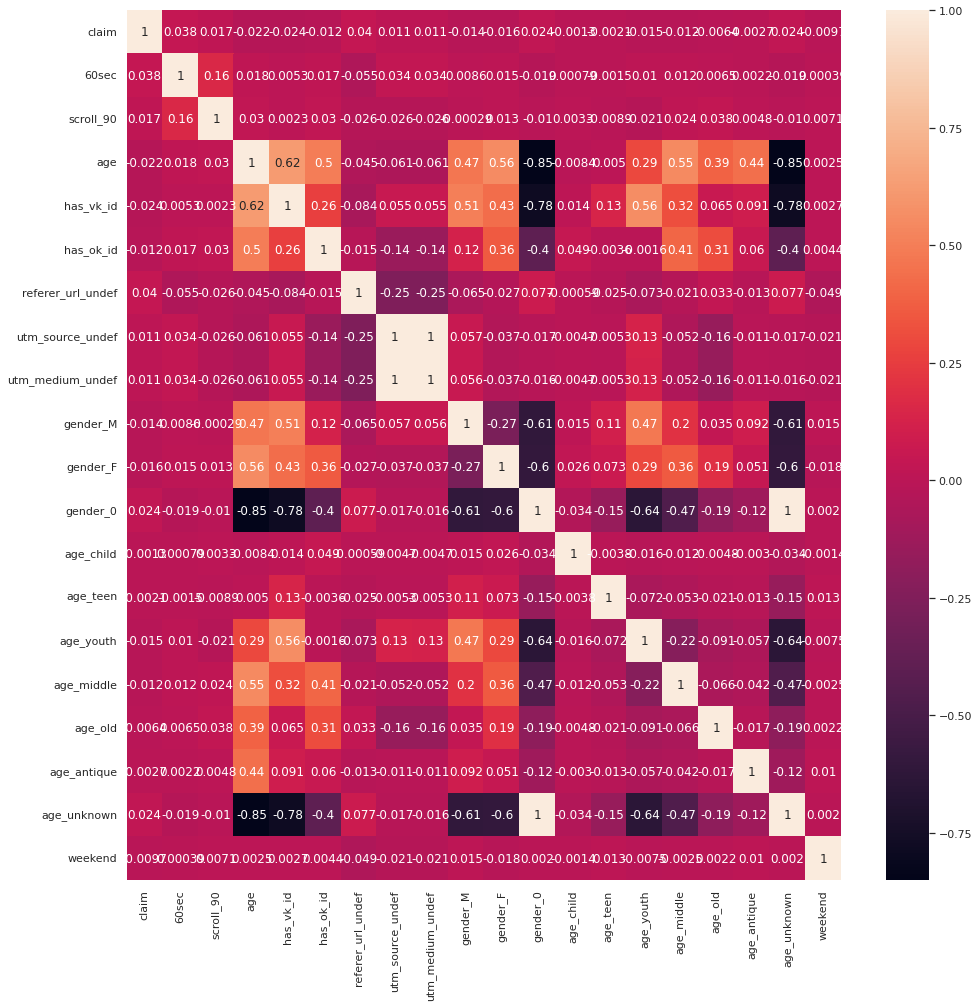

In [45]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), annot=True);

In [46]:
# data['event_date'] = data['hit_date'].dt.date
# dau = gb_data.groupby('event_date').agg({'session_id': 'nunique'})
# plt.plot(dau);

In [47]:
# на каких страницах прокрутка 90% и более
data[data['scroll_90'] == True]['url'].value_counts().head(5)

https://gb.ru/s/edufree/besplatno    26975
https://gb.ru/comms/chat             13277
https://gb.ru/education              12438
https://gb.ru/a/m7                    8061
https://gb.ru/comms/calendar          5647
Name: url, dtype: int64

In [48]:
# в какие даты было больше всего сессий
data['event_date'] = data['hit_date'].dt.strftime("%Y-%m-%d (%a)")
dau = data.groupby('event_date').agg({'session_id': 'nunique'})
dau.sort_values(by='session_id', ascending=False)

,session_id
event_date,
2021-12-02 (Thu),245923
2021-12-01 (Wed),224186
2021-12-04 (Sat),208103
2021-12-03 (Fri),191513


In [71]:
data.groupby('hit_date').size().to_frame('count').reset_index().sort_values('count', ascending=False)

,hit_date,count
1,2021-12-02,250158
0,2021-12-01,227725
3,2021-12-04,211636
2,2021-12-03,194888
